# In The name of GOD
#### In this note book we explore the data and get to know it better 
## Outline
### 1- Statistics
### 2-Dataset's Nan values 
### 3-Graphs and visualiztion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
import datetime

In [286]:
df = pd.read_csv('data.csv')
df=df.drop(df.columns[0] , axis=1) #index

In [287]:
df.head()

,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [288]:
df.describe()

,Year,Length,Market Share_total,Temperature in Montreal during episode
count,616656.000000,616656.000000,616656.000000,533312.000000
mean,2017.381420,3.203963,3.011562,6.707428
std,0.751344,5.306656,4.919562,12.178492
min,2016.000000,0.000000,0.000000,-27.425000
25%,2017.000000,2.000000,0.400000,-1.562500
50%,2017.000000,2.000000,1.400000,6.450000
75%,2018.000000,4.000000,3.400000,17.050000
max,2019.000000,92.000000,89.500000,34.950000


In [289]:
df.isna().any()

Episode                                   False
Station                                   False
Channel Type                              False
Season                                    False
Year                                      False
Date                                      False
Day of week                               False
Start_time                                 True
End_time                                   True
Length                                    False
Name of show                              False
Name of episode                            True
Genre                                     False
First time or rerun                       False
# of episode in the season                False
Movie?                                    False
Game of the Canadiens during episode?     False
Market Share_total                        False
Temperature in Montreal during episode     True
dtype: bool

In [290]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(['Year'] , axis=1)

df['Start_time'] = pd.to_datetime(df['Start_time'])
df['End_time'] = pd.to_datetime(df['End_time'])
df.head()

,Episode,Station,Channel Type,Season,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,Vidéoclips V,V Total,General Channel,Fall,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,"Infos, Les",V Total,General Channel,Fall,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [7]:
print("We have {} features which {} are continuous and {} are discrete".format(df.shape[1]-1 , 3 , df.shape[1]-4))

We have 17 features which 3 are continuous and 14 are discrete


In [8]:
for c in df.columns:
    print("{} : has {} number of categorize".format(c , len(df[c].unique())))

Episode : has 6687 number of categorize
Station : has 24 number of categorize
Channel Type : has 2 number of categorize
Season : has 4 number of categorize
Date : has 877 number of categorize
Day of week : has 7 number of categorize
Start_time : has 138322 number of categorize
End_time : has 138334 number of categorize
Length : has 39 number of categorize
Name of show : has 6687 number of categorize
Name of episode : has 86557 number of categorize
Genre : has 27 number of categorize
First time or rerun : has 2 number of categorize
# of episode in the season : has 2 number of categorize
Movie? : has 2 number of categorize
Game of the Canadiens during episode? : has 2 number of categorize
Market Share_total : has 545 number of categorize
Temperature in Montreal during episode : has 11829 number of categorize


In [318]:
disc_features = ['Episode' , 'Station' , 'Channel Type' , 'Season' , 'Day of week'  ,'Name of episode' , 'Genre' 
                ,'First time or rerun' , '# of episode in the season' , 'Movie?' , 'Game of the Canadiens during episode?']
cont_features = ['Date' , 'Start_time' , 'End_time' , 'Length' , 'Temperature in Montreal during episode']#Length ?!

label = 'Market Share_total'


***lets look at the range of the variable***

In [15]:
print("label is ranging from  {} to {}".format(min(df[label].unique()) , max(df[label].unique())))

label is ranging from  0.0 to 89.5


In [18]:
for c in cont_features:
    print("{} is ranging from {} to {}".format(c,min(df[c].unique()) , max(df[c].unique())))

Date is ranging from 2016-08-29T00:00:00.000000000 to 2019-01-22T00:00:00.000000000
Start_time is ranging from 2016-08-29T00:00:00.000000000 to 2019-01-22T23:45:00.000000000
End_time is ranging from 2016-08-29T00:28:00.000000000 to 2019-01-23T02:00:00.000000000
Length is ranging from 0 to 92
Temperature in Montreal during episode is ranging from -27.425 to 34.95


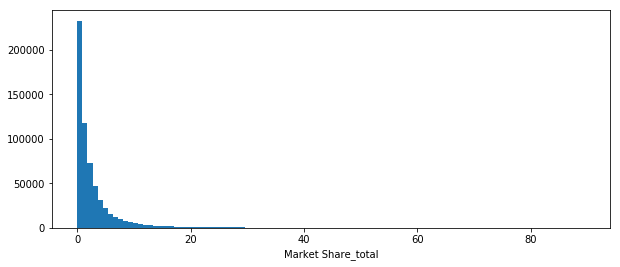

In [28]:
plt.figure(1,figsize=(10,4))
plt.hist(df[label] , 100)
plt.xlabel(label)
plt.show()

form the above histogram it seems lots of market share is in range (0,20) so let look more closer at them

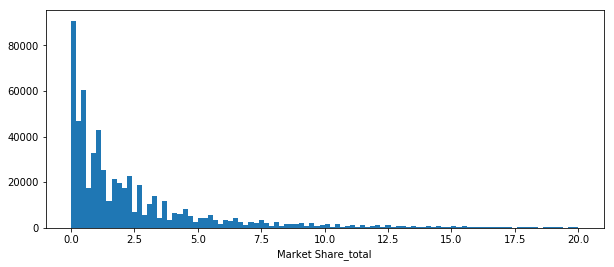

In [29]:
plt.figure(1,figsize=(10,4))
plt.hist(df[label] , 100 , (0,20))
plt.xlabel(label)
plt.show()

it looks like an exponential distribution :)

Feature engineering from timestamp variables : date , Start_time , End_time

1-lets look at thier trends

In [54]:
t=pd.Series(df[label].values , index=df['End_time'])

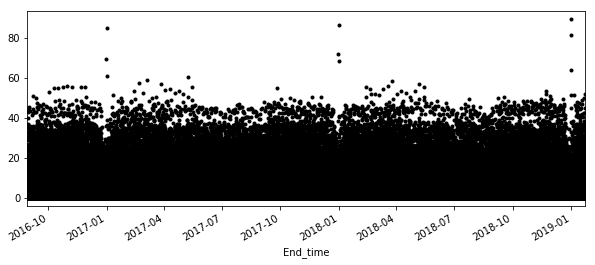

In [58]:
plt.figure(1,figsize=(10,4))
t.plot(style='k.')
plt.show()

Encode Categories with numerical value which make it easier to make it one-hot later

In [319]:

for c in disc_features:
    df[c] = df[c].astype('category').cat.codes

In [320]:
df.head(5)

,Episode,Station,Channel Type,Season,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,6388,21,0,0,2016-08-29,1,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,79725,11,0,1,0,0,0.9,20.400
1,249,21,0,0,2016-08-29,1,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,16376,8,0,1,0,0,0.5,19.125
2,2086,21,0,0,2016-08-29,1,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,34642,7,0,1,0,0,0.3,19.125
3,2088,21,0,0,2016-08-29,1,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",34646,14,0,1,0,0,1.7,18.125
4,5870,21,0,0,2016-08-29,1,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",72884,20,0,1,0,0,2.2,18.250


In [34]:
#lets check wheter all the start_time date are the same as date
np.sum(df['Start_time'].apply(lambda x : x.date()) == df['Date'].apply(lambda x : x.date()))/len(df)#percentage of time date equals start_time

0.9999302690641135

### Filling Nan values :

There are four columns with nan values ***Start_time*** , ***End_time*** , ***Temperature in Montreal*** , ***Name of episode***

Filling startegies is as follows : 

1-Start_time , End_time are filled  according to thier previous or next values and if both were Nan with Length

2-Temperature is filled with average of the day

3-Name of episode is filled with the Name of show

In [312]:
temp = (df['Start_time'].apply(lambda x : x.date()) == df['Date'].apply(lambda x : x.date()))
temp[temp==False]#start_time is not equal to date lets see why
nantimes = temp[temp==False]
doublemissed = [(t,t+1) for t in nantimes.index if t+1 in nantimes.index]
doublemissed

[(141691, 141692),
 (141740, 141741),
 (141850, 141851),
 (141879, 141880),
 (399561, 399562),
 (399578, 399579),
 (399993, 399994),
 (400024, 400025)]

In [313]:
for i,t in nantimes.iteritems():
    if i-1 not in nantimes.index:
        df.iloc[i,df.columns.get_loc('Start_time')]=df.iloc[i-1]['End_time']
    if i+1 not in nantimes.index:
        df.iloc[i,df.columns.get_loc('End_time')]=df.iloc[i+1]['End_time']
for t in doublemissed:
    df.iloc[t[0] , df.columns.get_loc('End_time')] = df.iloc[t[0]]['Start_time'] + datetime.timedelta(minutes = int(df.iloc[t[0]]['Length']*15))
    df.iloc[t[1] , df.columns.get_loc('Start_time')] = df.iloc[t[0]]['End_time']

In [249]:
temp = df['Temperature in Montreal during episode'].isna()
nantemp = temp[temp==True]
nantemp.index

c = 'Temperature in Montreal during episode'
ttc = df.groupby('Date').mean()
notfilled=[]
for i,t in nantemp.iteritems():
    df.iloc[i,df.columns.get_loc(c)]=ttc.loc[df.iloc[i]['Date']][c] #average of temp in that day

Int64Index([    26,     27,     30,     31,     32,     33,     35,     38,
                60,     65,
            ...
            616582, 616584, 616587, 616590, 616591, 616594, 616597, 616602,
            616615, 616620],
           dtype='int64', length=83344)

In [310]:
c = 'Name of episode'
temp = df[c].isna()
nantemp = temp[temp==True]
notfilled=[]
for i,t in nantemp.iteritems():
    df.iloc[i,df.columns.get_loc(c)]=df.iloc[i]['Episode'] #name of episode

### Lets answer some questions
Is there any duplicate columns?

How to make distinguishing factor from date and start_time and end_time?

How much accuracy can we get by just reporting mean value?

Is Market share given episode stationary enough to fool our model?

In [76]:
df.head()

,Episode,Station,Channel Type,Season,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,6388,21,0,0,2016-08-29,1,2016-08-29 06:00:00,2016-08-29 08:00:00,8,6388,-1,11,0,1,0,0,0.9,20.400
1,249,21,0,0,2016-08-29,1,2016-08-29 08:00:00,2016-08-29 08:30:00,2,249,-1,8,0,1,0,0,0.5,19.125
2,2086,21,0,0,2016-08-29,1,2016-08-29 08:30:00,2016-08-29 09:00:00,2,2086,-1,7,0,1,0,0,0.3,19.125
3,2088,21,0,0,2016-08-29,1,2016-08-29 09:00:00,2016-08-29 10:00:00,4,2088,-1,14,0,1,0,0,1.7,18.125
4,5870,21,0,0,2016-08-29,1,2016-08-29 10:00:00,2016-08-29 10:30:00,2,5870,-1,20,0,1,0,0,2.2,18.250


In [80]:
np.sum(df['Episode'] == df['Name of show'])/len(df)

1.0

In [81]:
df = df.drop(['Name of show'] , axis=1)
df.head()

,Episode,Station,Channel Type,Season,Date,Day of week,Start_time,End_time,Length,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,6388,21,0,0,2016-08-29,1,2016-08-29 06:00:00,2016-08-29 08:00:00,8,-1,11,0,1,0,0,0.9,20.400
1,249,21,0,0,2016-08-29,1,2016-08-29 08:00:00,2016-08-29 08:30:00,2,-1,8,0,1,0,0,0.5,19.125
2,2086,21,0,0,2016-08-29,1,2016-08-29 08:30:00,2016-08-29 09:00:00,2,-1,7,0,1,0,0,0.3,19.125
3,2088,21,0,0,2016-08-29,1,2016-08-29 09:00:00,2016-08-29 10:00:00,4,-1,14,0,1,0,0,1.7,18.125
4,5870,21,0,0,2016-08-29,1,2016-08-29 10:00:00,2016-08-29 10:30:00,2,-1,20,0,1,0,0,2.2,18.250


In [321]:
df['End_time'] = df['End_time'].apply(lambda x : x.time())
df['Start_time'] = df['Start_time'].apply(lambda x : x.time())
df.head()

,Episode,Station,Channel Type,Season,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,6388,21,0,0,2016-08-29,1,06:00:00,08:00:00,8,Vidéoclips V,79725,11,0,1,0,0,0.9,20.400
1,249,21,0,0,2016-08-29,1,08:00:00,08:30:00,2,Apollo dans l'frigo,16376,8,0,1,0,0,0.5,19.125
2,2086,21,0,0,2016-08-29,1,08:30:00,09:00:00,2,Infopublicité,34642,7,0,1,0,0,0.3,19.125
3,2088,21,0,0,2016-08-29,1,09:00:00,10:00:00,4,"Infos, Les",34646,14,0,1,0,0,1.7,18.125
4,5870,21,0,0,2016-08-29,1,10:00:00,10:30:00,2,"Souper presque parfait, Un",72884,20,0,1,0,0,2.2,18.250


In [322]:
df.to_csv("complete.csv" , index=False)

In [270]:
#df.to_csv('postdata.csv')
df = pd.read_csv('postdata.csv')
df=df.drop(df.columns[0] , axis=1)
df['Start_time'] = pd.to_datetime(df['Start_time'])
df['End_time'] = pd.to_datetime(df['End_time'])
df.head()

,Episode,Station,Channel Type,Season,Date,Day of week,Start_time,End_time,Length,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,6388,21,0,0,2016-08-29 00:00:00,1,2020-03-27 06:00:00,2020-03-27 08:00:00,8,-1,11,0,1,0,0,0.9,20.400
1,249,21,0,0,2016-08-29 00:00:00,1,2020-03-27 08:00:00,2020-03-27 08:30:00,2,-1,8,0,1,0,0,0.5,19.125
2,2086,21,0,0,2016-08-29 00:00:00,1,2020-03-27 08:30:00,2020-03-27 09:00:00,2,-1,7,0,1,0,0,0.3,19.125
3,2088,21,0,0,2016-08-29 00:00:00,1,2020-03-27 09:00:00,2020-03-27 10:00:00,4,-1,14,0,1,0,0,1.7,18.125
4,5870,21,0,0,2016-08-29 00:00:00,1,2020-03-27 10:00:00,2020-03-27 10:30:00,2,-1,20,0,1,0,0,2.2,18.250


In [140]:
for c in disc_features:
    dfgem = df.groupby(c).mean()
    dfgec = df.groupby(c).count()

    #sum of residual
    l=[0 for i in range(len(dfgem))] #its going to be statndaed deviation
    for i,x in df.iterrows():
        l[x[c]]+=(dfgem.iloc[x[c]][label] - x[label])**2
    for i in range(len(l)):
        l[i] = l[i]/(dfgec.iloc[i][label])**0.5

    labelcv = [l[i]/dfgem.iloc[i][label] for i in range(len(l)) ]



    theta = 10
    count=0
    for cv in l:
        if cv<theta:
            count+=1

    print("by knowing {}just by reporting the mean {} percent of time we are off by {}".format(c,round(count/len(labelcv)*100 ,4) , theta))

c:\users\sajjad\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


by knowing Episodejust by reporting the mean 69.3285 percent of time we are off by 10
by knowing Stationjust by reporting the mean 8.3333 percent of time we are off by 10
by knowing Channel Typejust by reporting the mean 0.0 percent of time we are off by 10
by knowing Seasonjust by reporting the mean 0.0 percent of time we are off by 10
by knowing Day of weekjust by reporting the mean 0.0 percent of time we are off by 10


c:\users\sajjad\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


by knowing Name of episodejust by reporting the mean 56.2519 percent of time we are off by 10
by knowing Genrejust by reporting the mean 3.7037 percent of time we are off by 10
by knowing First time or rerunjust by reporting the mean 0.0 percent of time we are off by 10
by knowing # of episode in the seasonjust by reporting the mean 0.0 percent of time we are off by 10
by knowing Movie?just by reporting the mean 0.0 percent of time we are off by 10
by knowing Game of the Canadiens during episode?just by reporting the mean 0.0 percent of time we are off by 10


from what has reported above we can say with some confidence that market share value give the episode is stationary to some extent

In [142]:
dfgec = df.groupby('Episode').count()
dfgec.head()

,Station,Channel Type,Season,Date,Day of week,Start_time,End_time,Length,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
Episode,,,,,,,,,,,,,,,,
0,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
1,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117


**lets look at some of the series thorught out time**

c:\users\sajjad\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736345.0, right=736345.0
  ax.set_xlim(left, right)
c:\users\sajjad\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736635.0, right=736635.0
  ax.set_xlim(left, right)
c:\users\sajjad\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736946.0, right=736946.0
  ax.set_xlim(left, right)


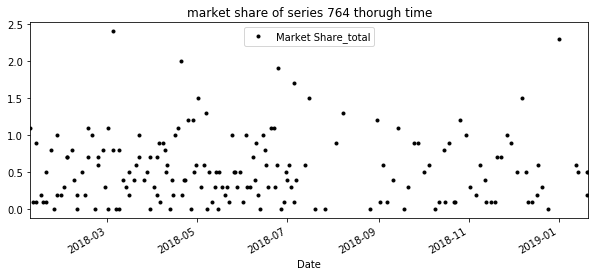

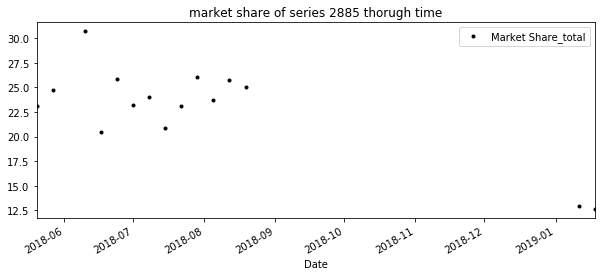

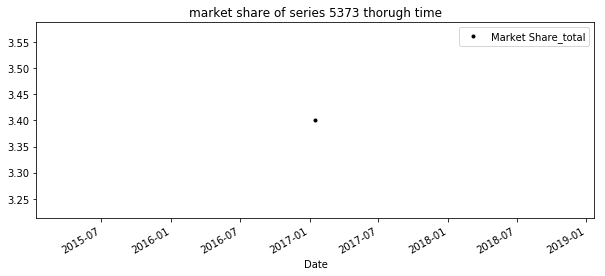

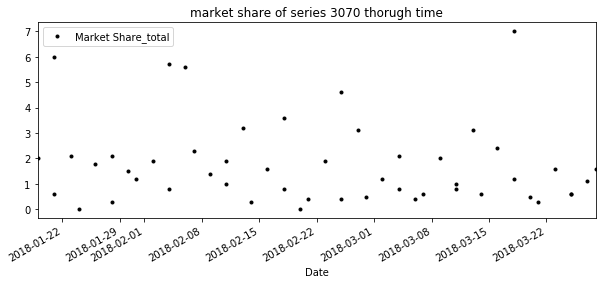

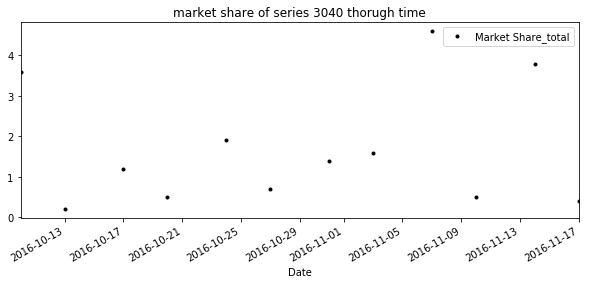

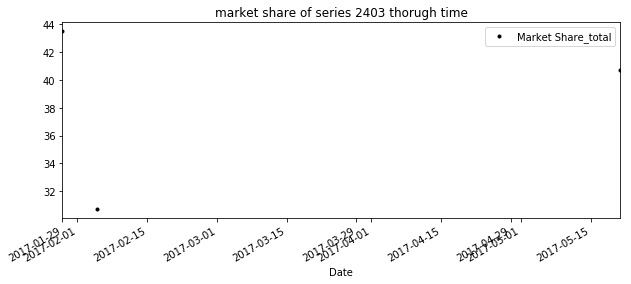

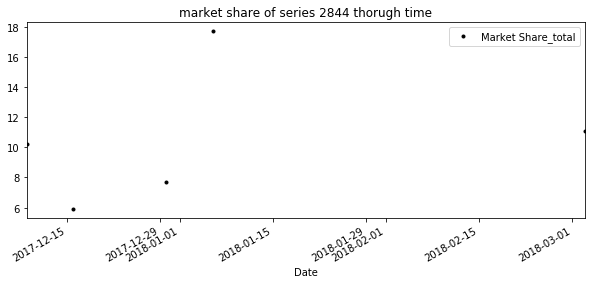

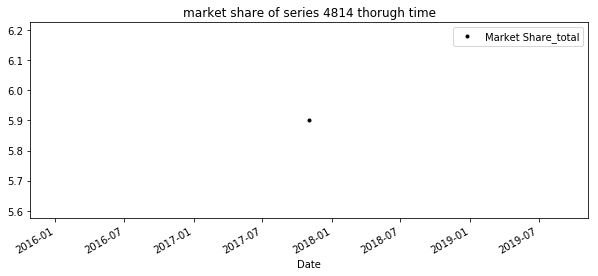

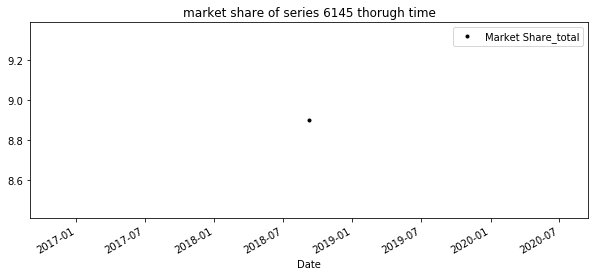

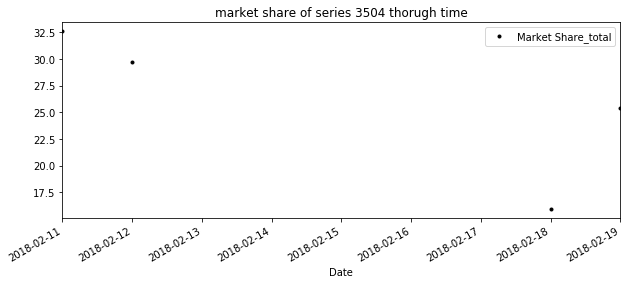

In [162]:
import random
for i in range(10):
    e = random.choice(dfgec.index)
    t=df[df['Episode']==e][['Date' , label]]
    t=t.set_index('Date')
    
    t.plot(style='k.' , figsize=(10,4),title="market share of series {} thorugh time".format(e))

**lets look at some specifc date and see how things are**

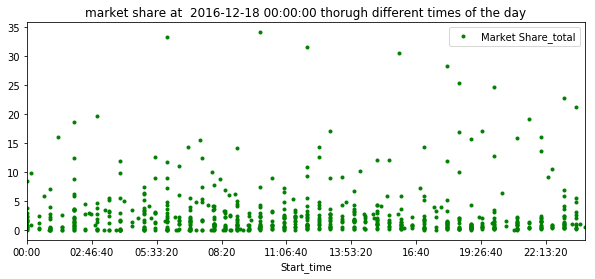

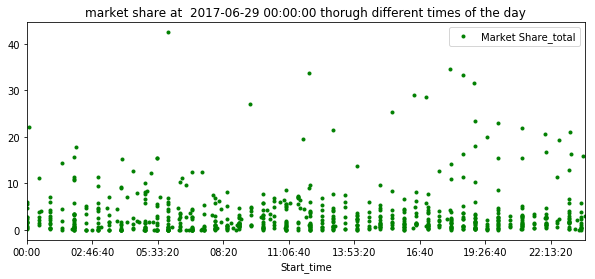

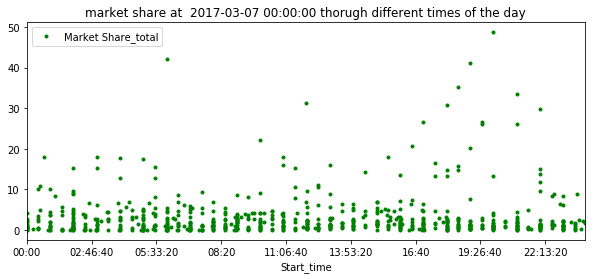

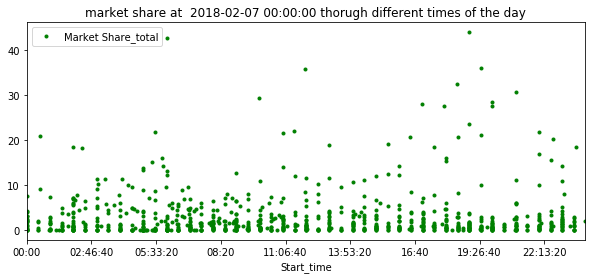

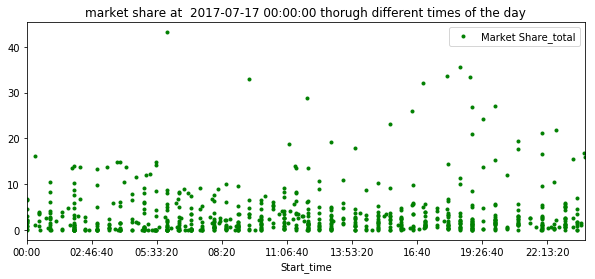

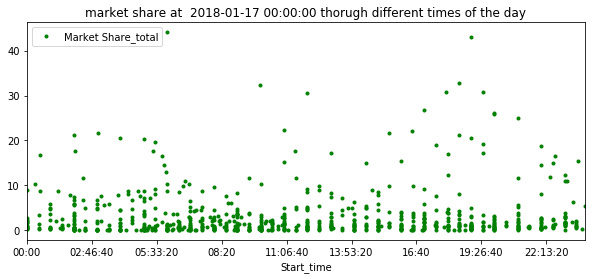

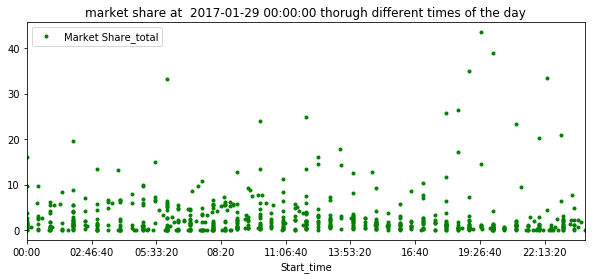

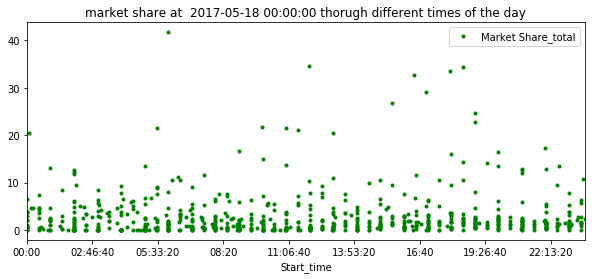

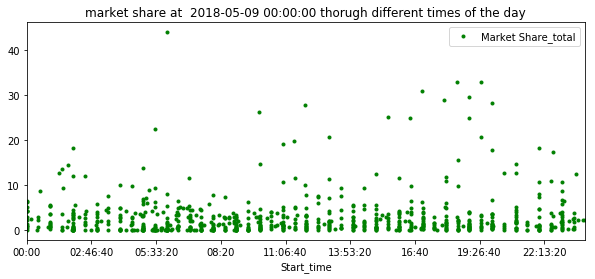

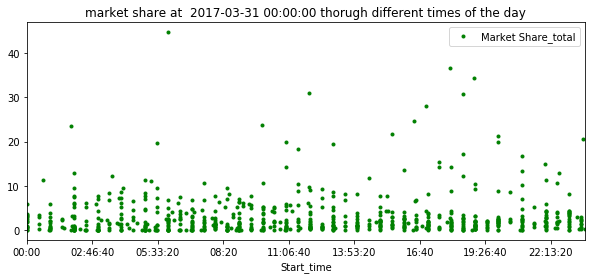

In [176]:
dfgec = df.groupby('Date').count()
import random
for i in range(10):
    e = random.choice(dfgec.index)
    t=df[df['Date']==e][['Start_time' , label]]
    t=t.set_index('Start_time').sort_index()
    #print(t)
    #print("sum of all market share {}".format(np.sum(t[label])))
    t.plot(style='g.' , figsize=(10,4),title="market share at  {} thorugh different times of the day".format(e))

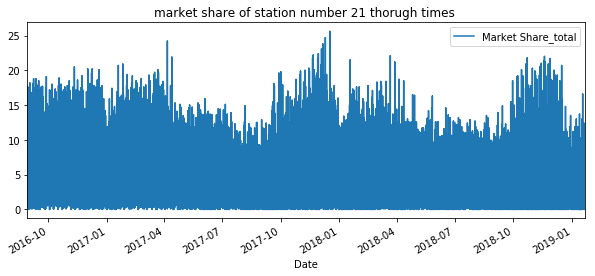

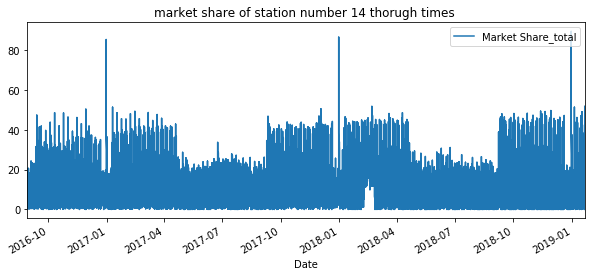

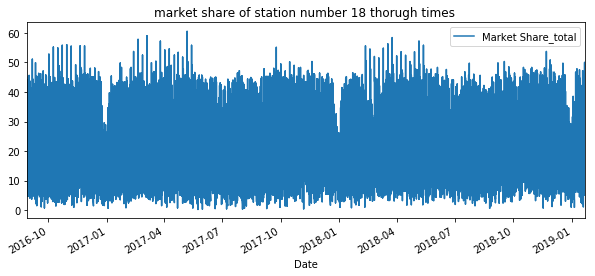

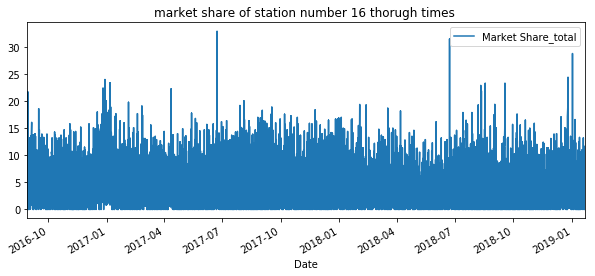

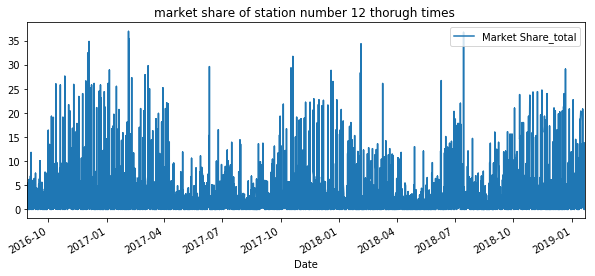

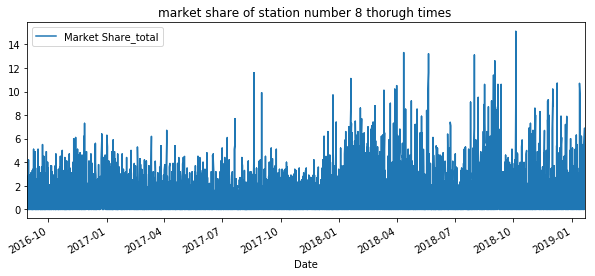

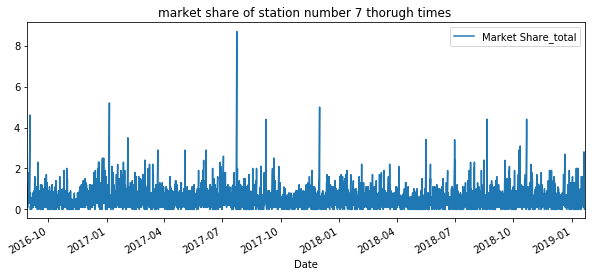

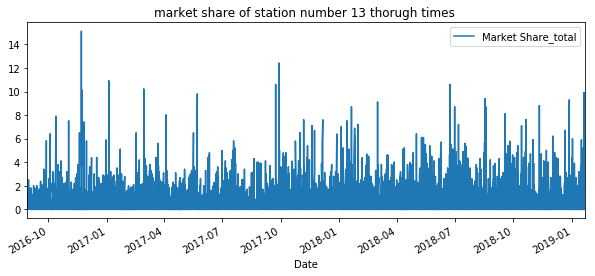

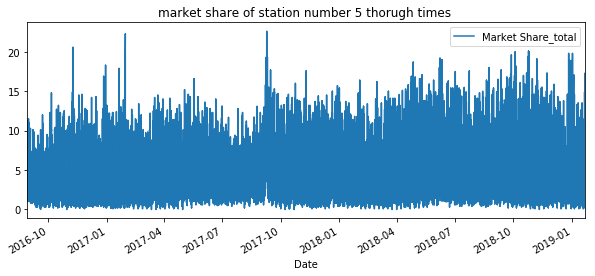

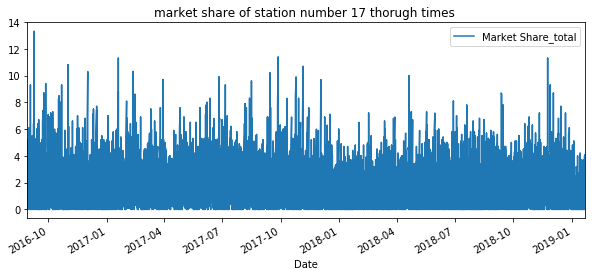

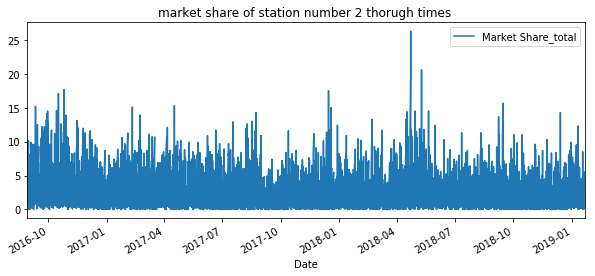

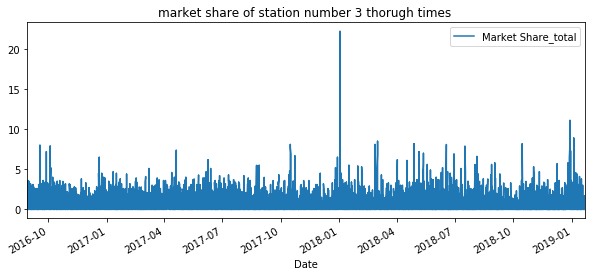

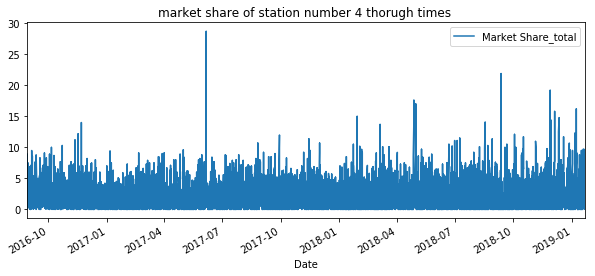

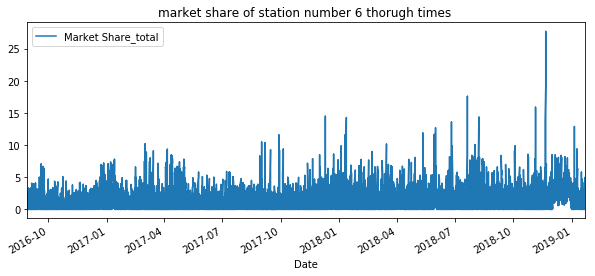

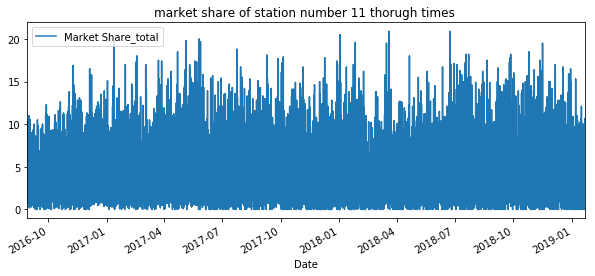

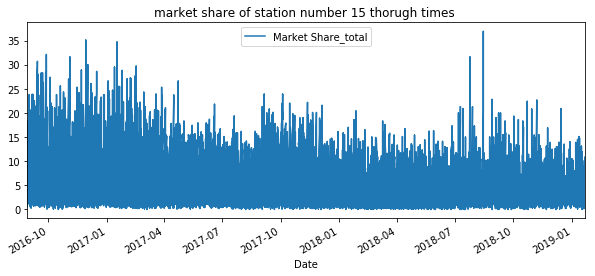

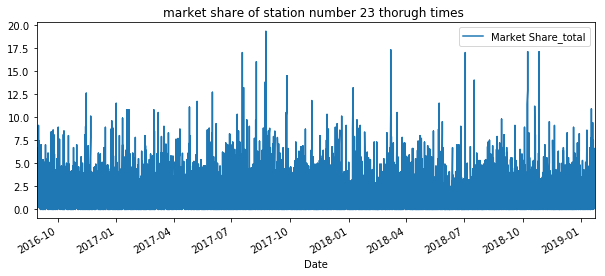

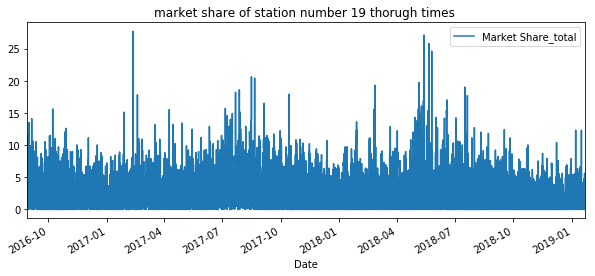

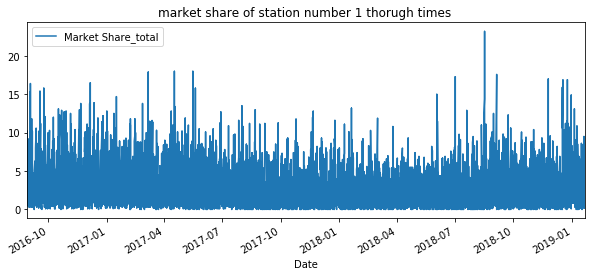

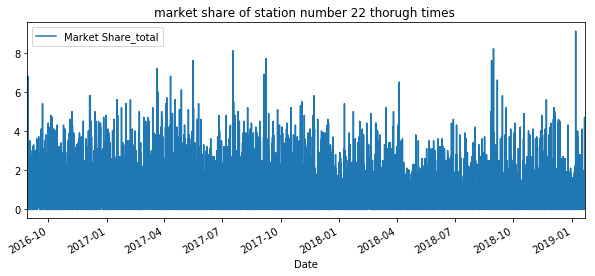

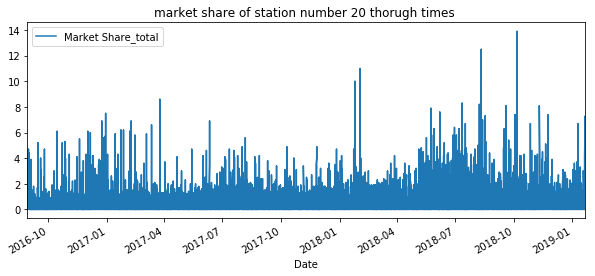

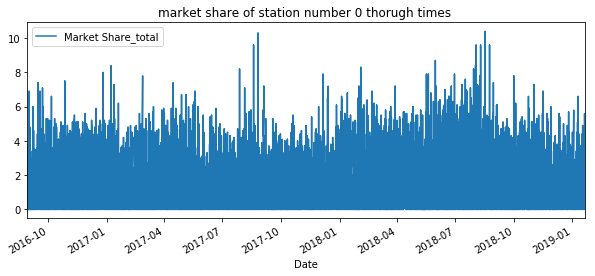

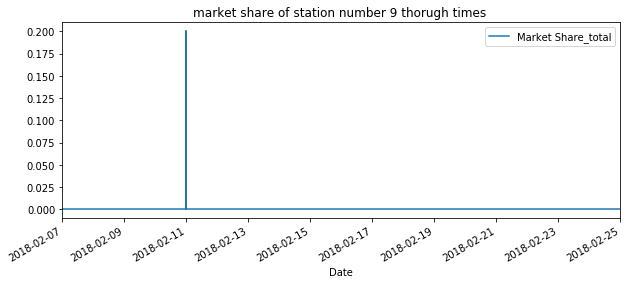

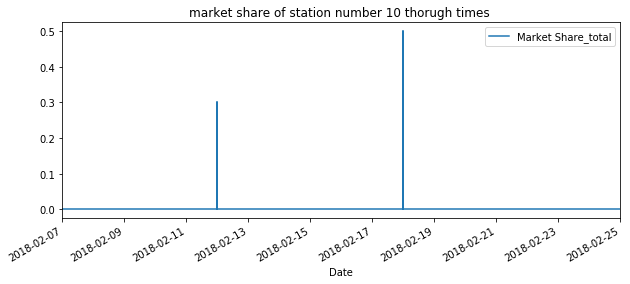

In [184]:
dfgec = df.groupby('Station').count()
import random
for e in df['Station'].unique():
    t=df[df['Station']==e][['Date' , label]]
    t=t.set_index('Date').sort_index()
    #print(t)
    #print("sum of all market share {}".format(np.sum(t[label])))
    t.plot( figsize=(10,4),title="market share of station number {} thorugh times ".format(e))

**Heatmap of pairwise discrete features in order to capture correlation between two**

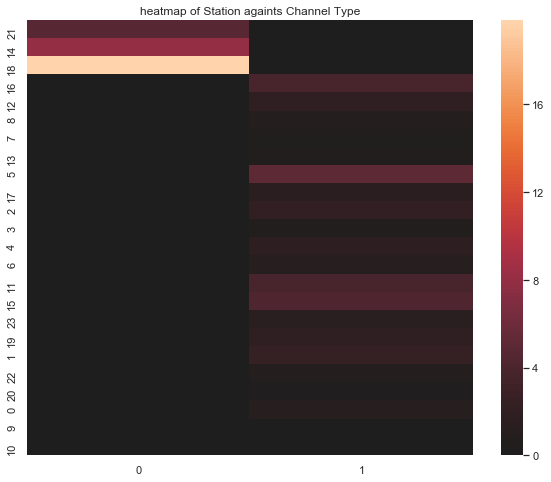

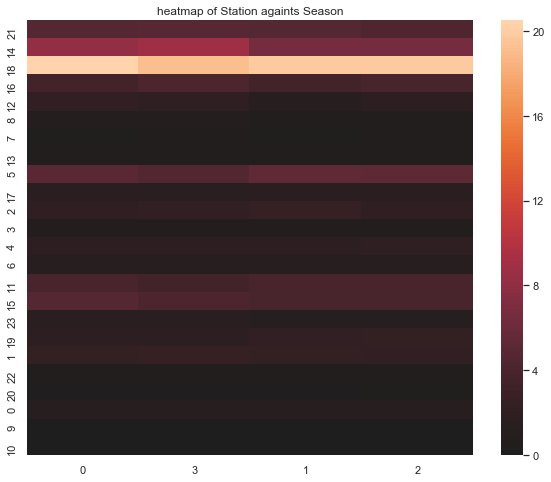

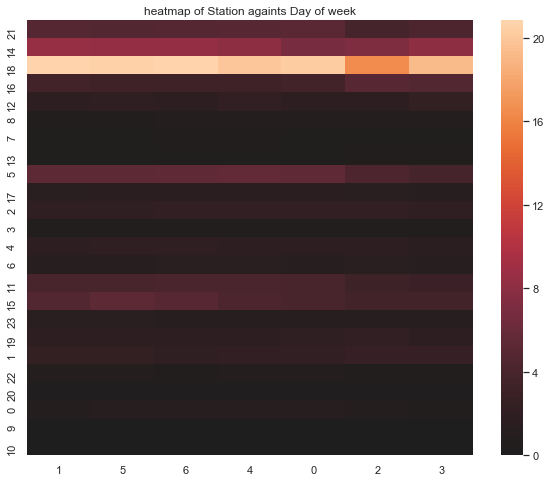

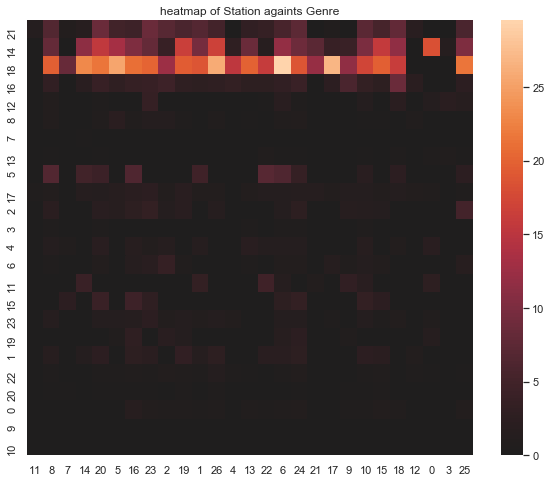

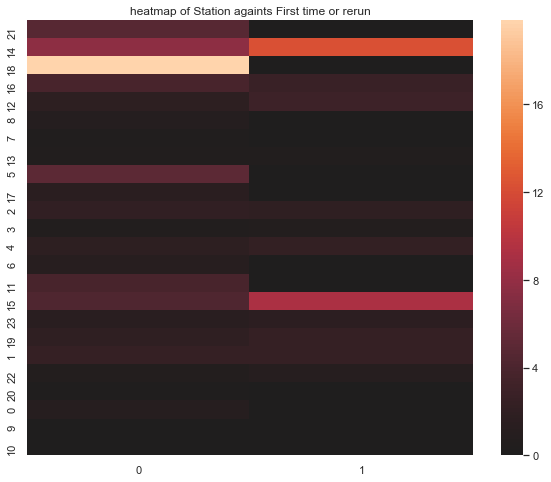

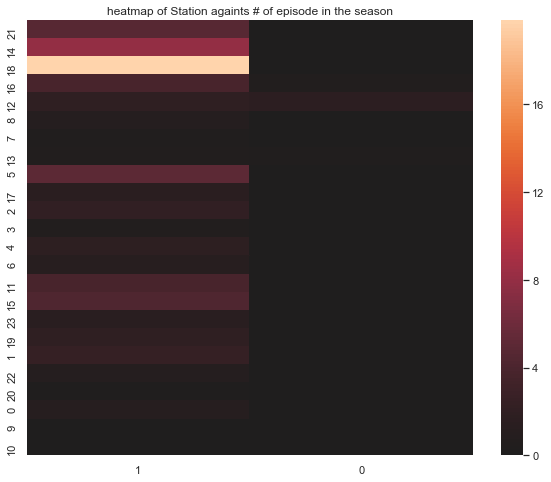

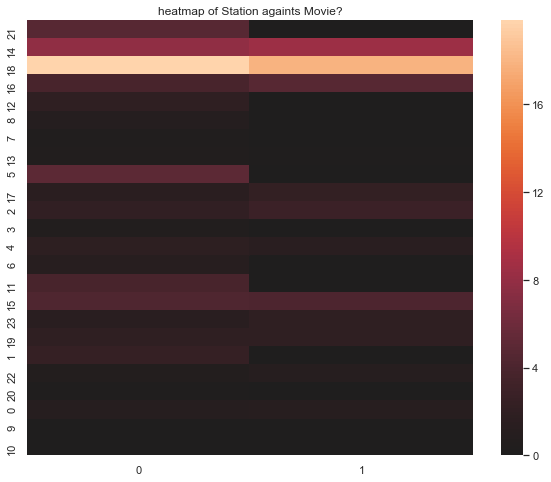

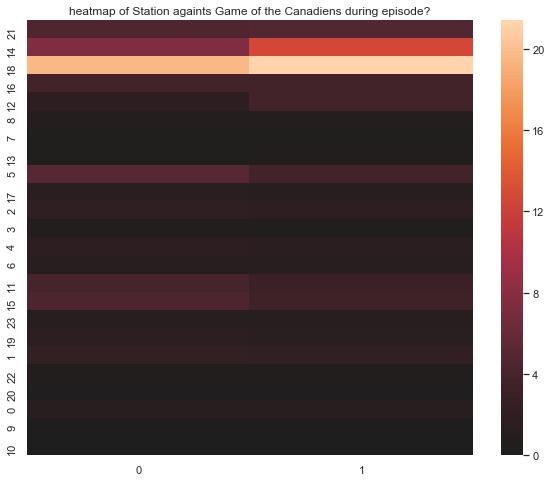

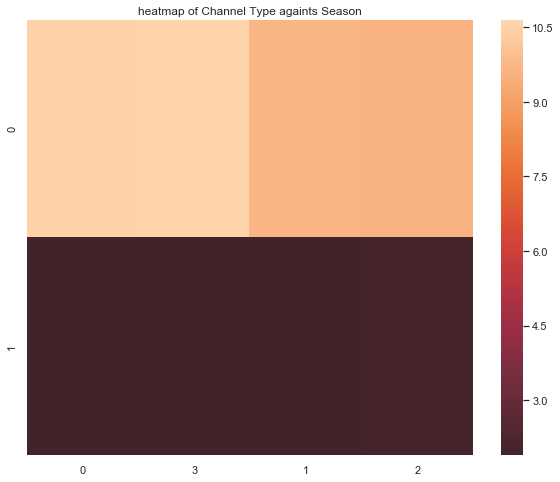

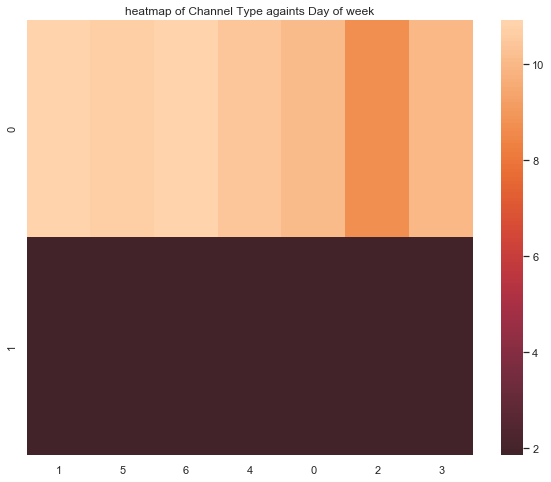

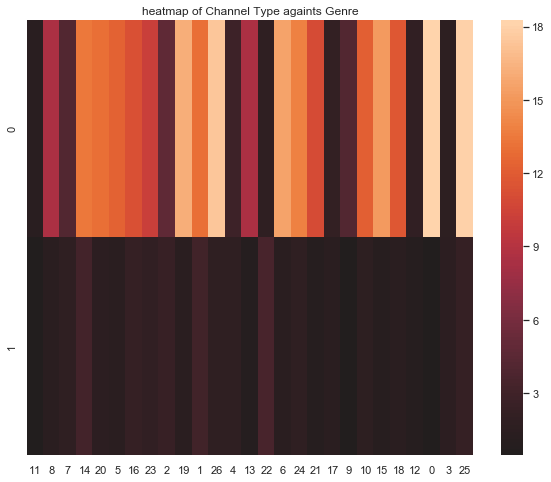

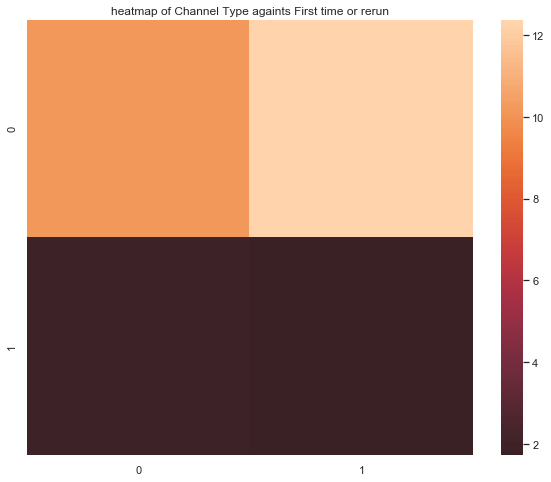

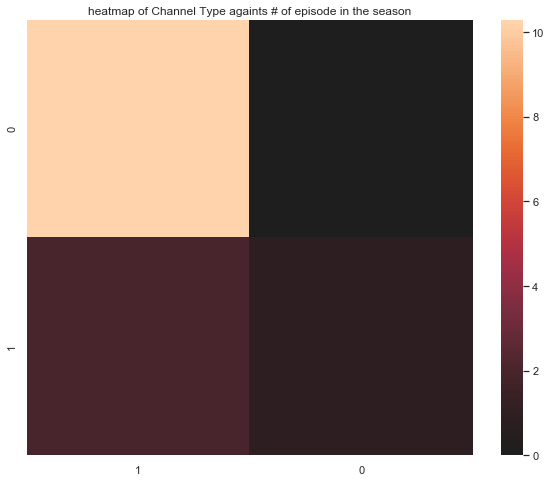

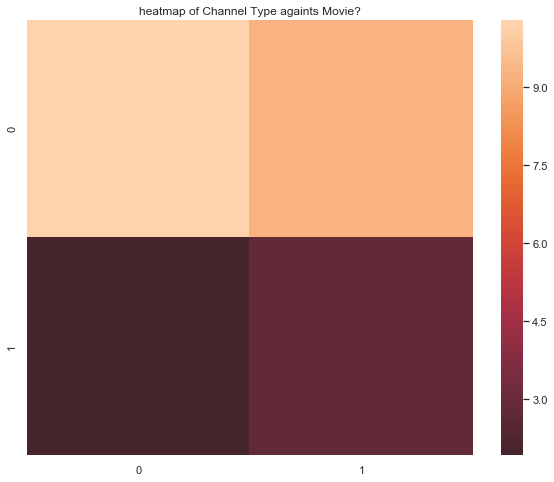

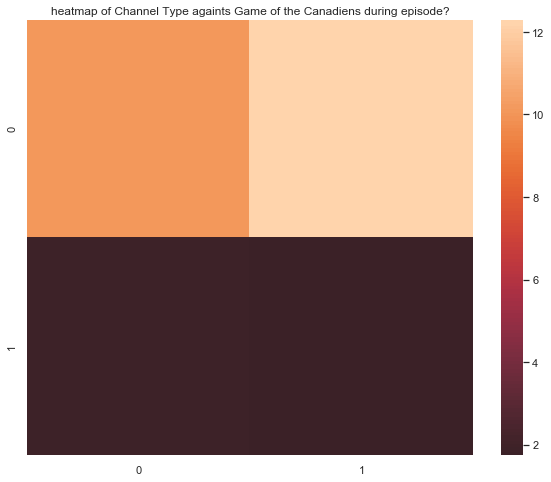

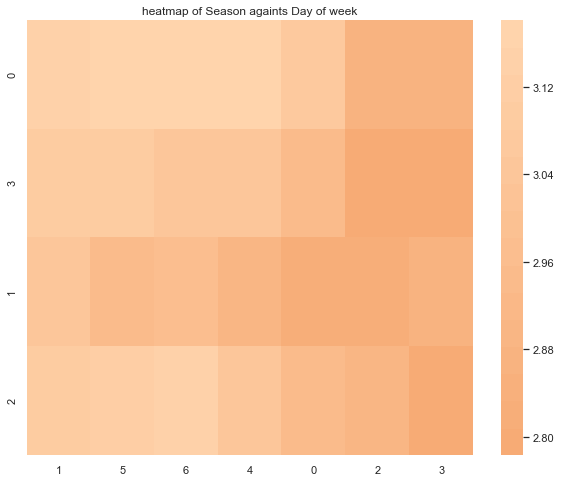

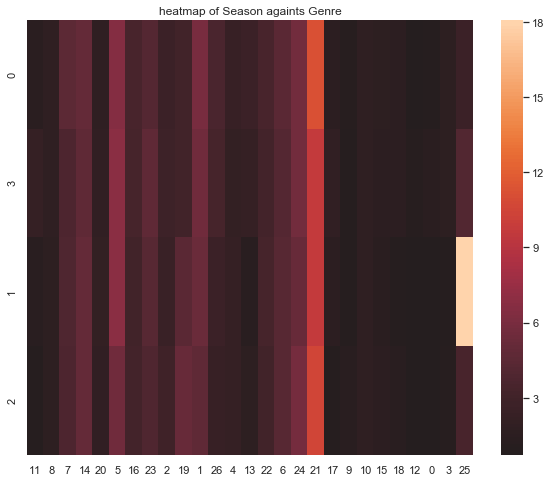

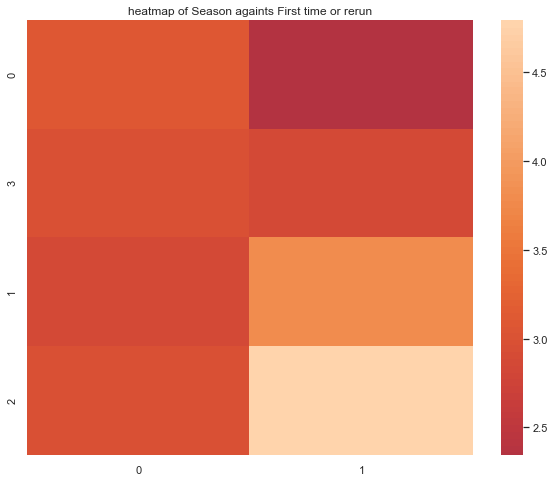

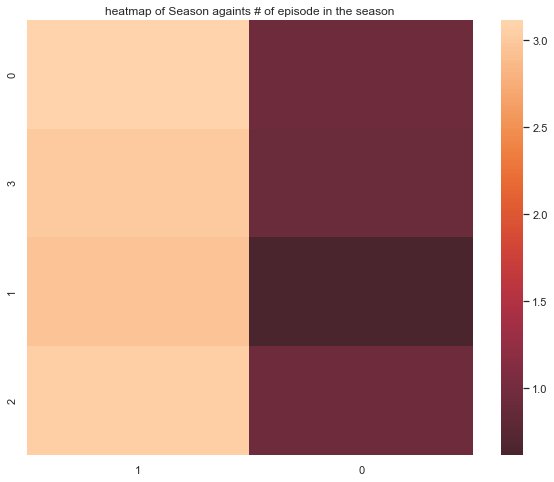

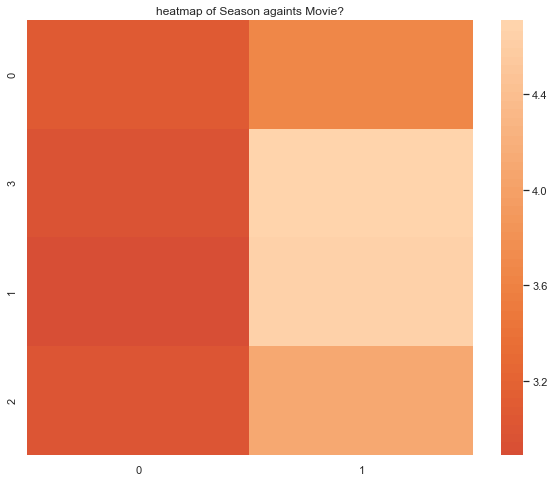

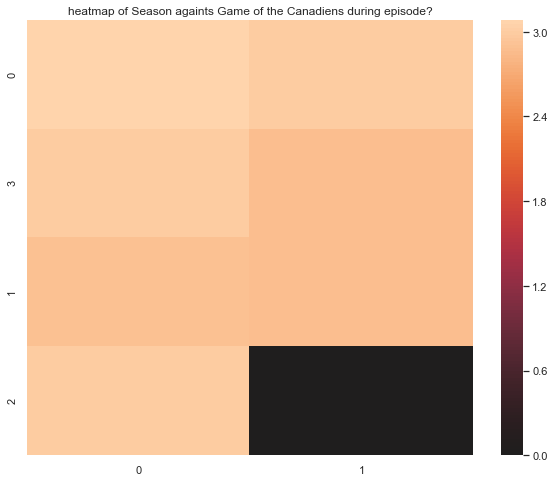

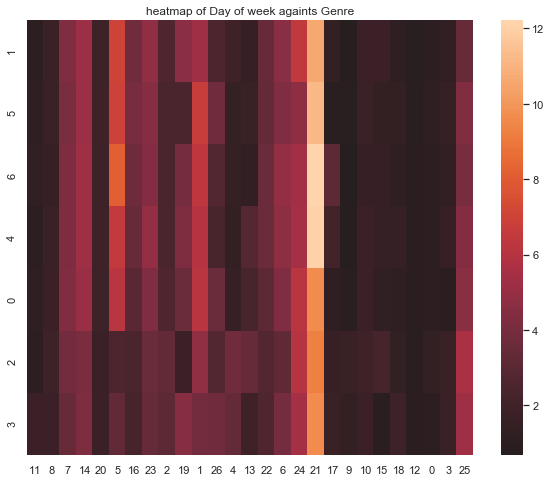

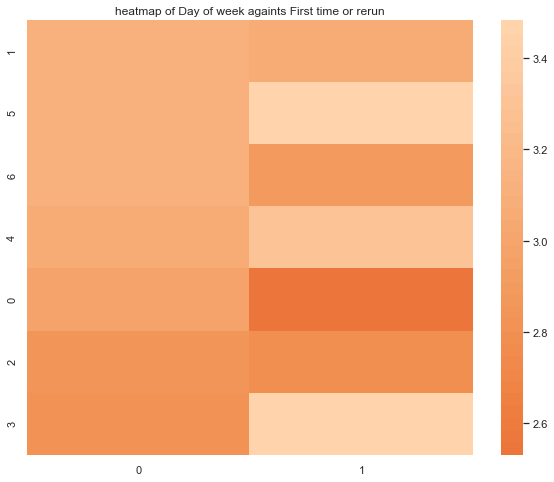

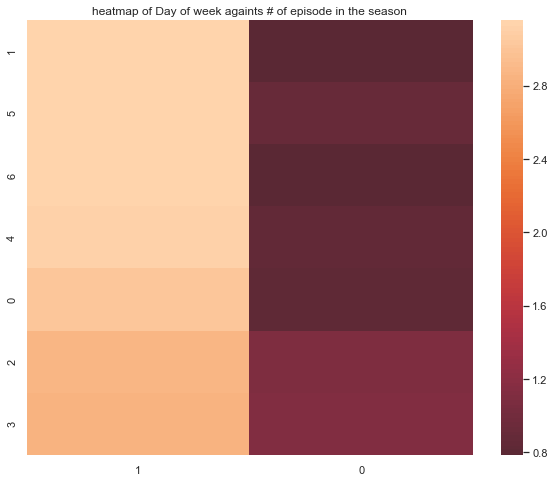

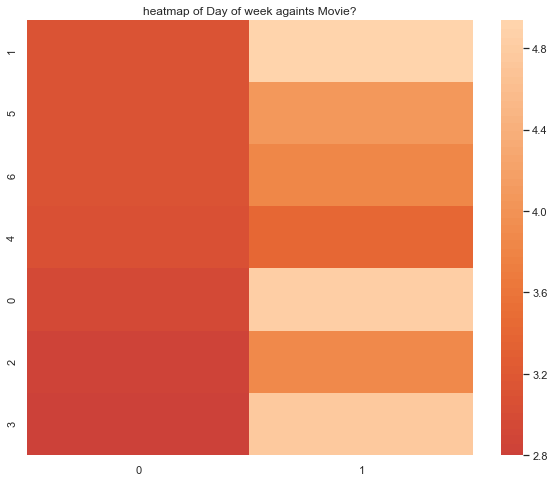

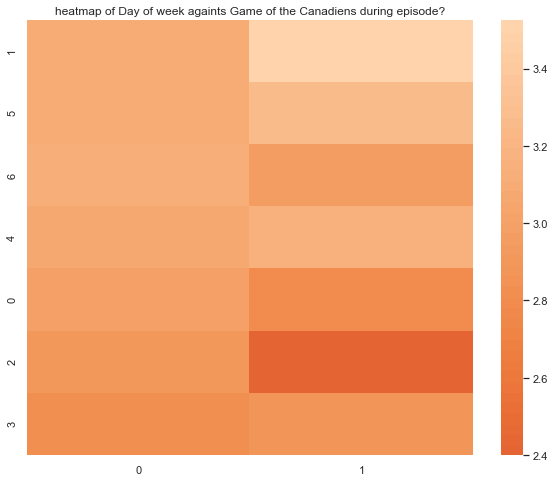

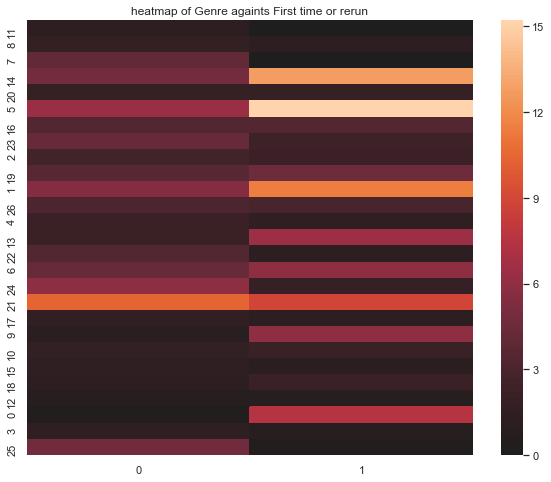

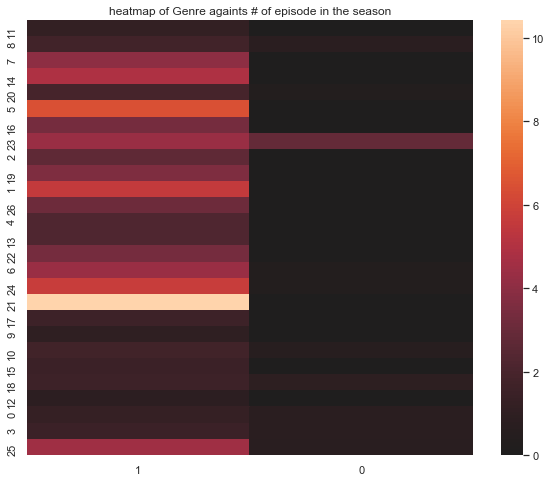

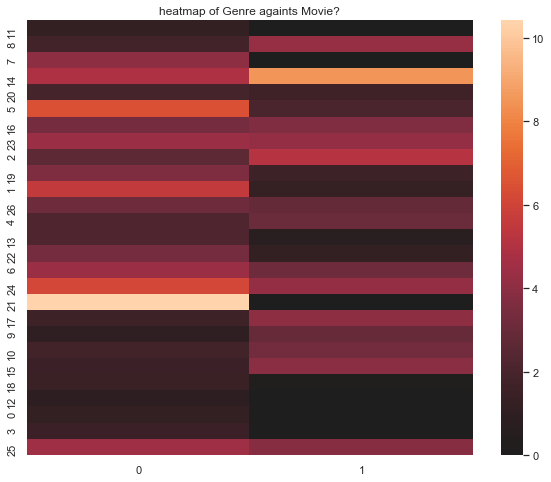

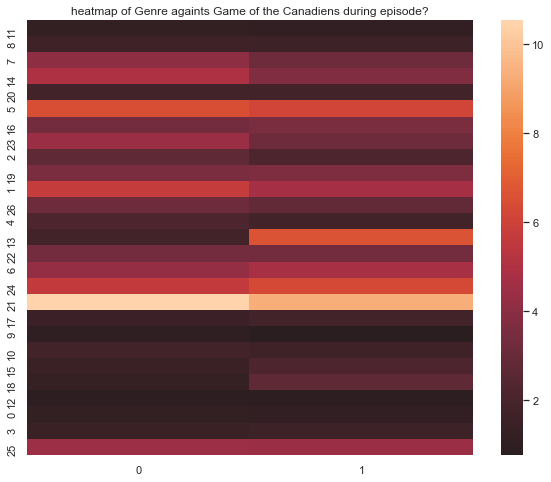

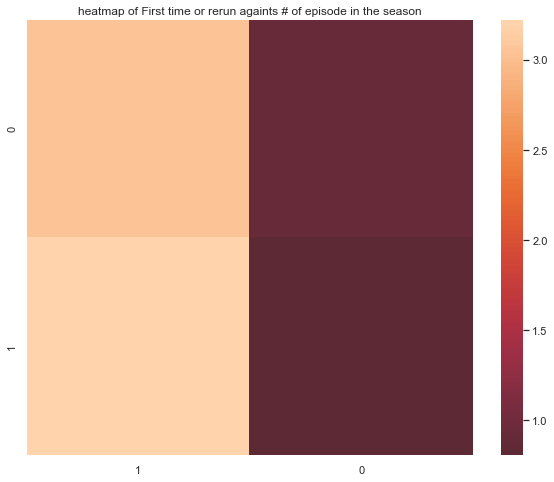

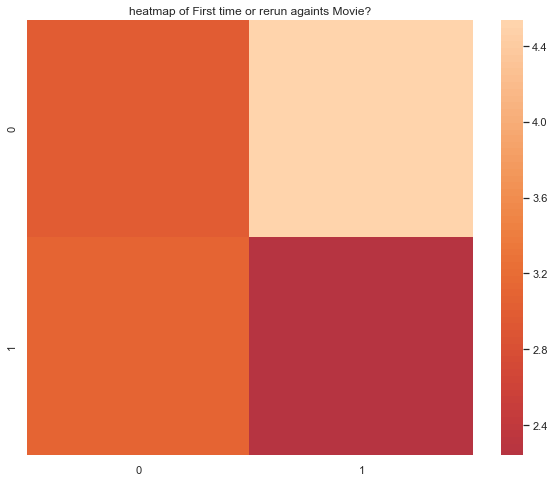

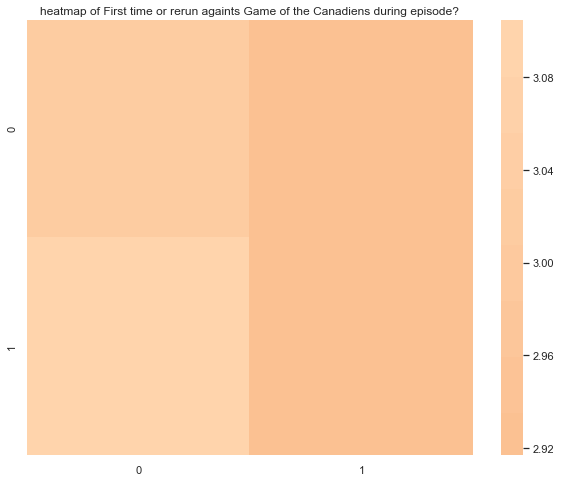

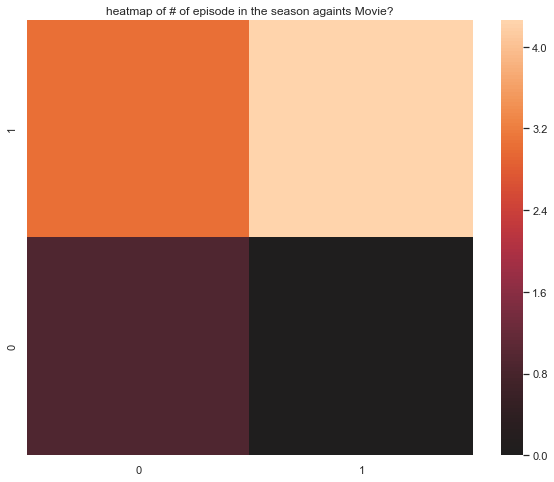

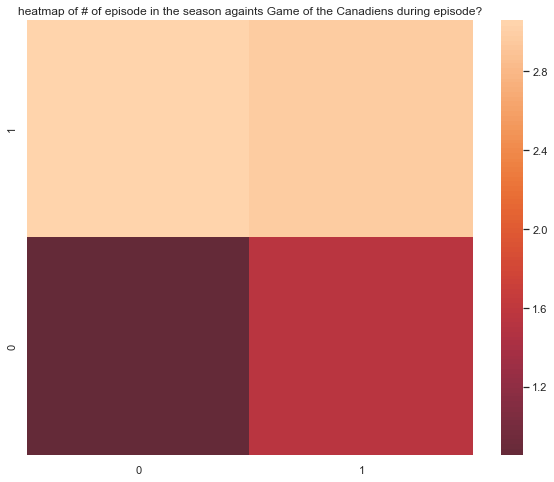

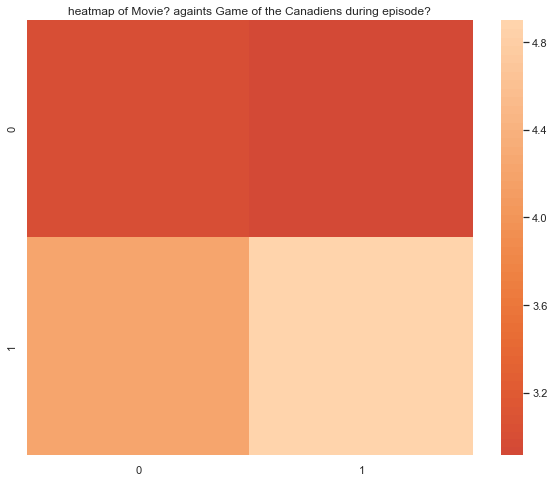

In [235]:
import seaborn as sns
sns.set()
dd=['Station' , 'Channel Type' , 'Season' , 'Day of week' , 'Genre' , 'First time or rerun' , '# of episode in the season'
   , 'Movie?' , 'Game of the Canadiens during episode?']
for i in range(len(dd)):
    for j in range(i+1,len(dd)):
        c1 = dd[i]
        c2 = dd[j]
        tcs=df.groupby([c1,c2])
        tcc=tcs.count()
        tcs = tcs.sum()
        nc1 = df[c1].unique()
        nc2 = df[c2].unique()
        a = np.zeros((len(nc1) , len(nc2)))
        for i1 , r1 in enumerate(nc1):
            for j1 , r2 in enumerate(nc2):
                try:
                    a[i1][j1] = tcs.loc[(r1,r2)][label]/tcc.loc[(r1,r2)][label]
                except:
                    continue
        fig , ax = plt.subplots(figsize=(10,8))
        plt.title("heatmap of {} againts {}".format(c1,c2))
        sns.heatmap(a,yticklabels=nc1 , xticklabels=nc2 , center=0)

In [236]:
df.to_csv('postdata.csv')

## lets look at test

In [241]:
dftest = pd.read_csv('test.csv')
dftest = dftest.drop(dftest.columns[0] , axis=1)
dftest.head()

,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Temperature in Montreal during episode
0,Mom V.F. (M),VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 11:30:00,2019-01-22 12:00:00,2,Mom V.F. (M),Abstinence,Ongoing Comedy Series (Sitcoms),No,Yes,No,No,-22.525
1,2 filles fauchées,VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 12:00:00,2019-01-22 12:30:00,2,2 filles fauchées,Et la rupture,Ongoing Comedy Series (Sitcoms),No,Yes,No,No,-21.625
2,The Big Bang Theory,VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 12:30:00,2019-01-22 13:00:00,2,The Big Bang Theory,La désintégration de la sonde spatiale,Ongoing Comedy Series (Sitcoms),No,Yes,No,No,-21.625
3,Flashpoint,VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 13:00:00,2019-01-22 14:00:00,4,Flashpoint,Retraite impossible (P),Ongoing Dramatic Series,Yes,Yes,No,No,-20.375
4,Les Frères Scott,VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 14:00:00,2019-01-22 15:00:00,4,Les Frères Scott,Premières désillusions,Ongoing Dramatic Series,No,Yes,No,No,-19.100


In [242]:
dftest.describe()

,Year,Length,Temperature in Montreal during episode
count,154165.0,154165.000000,130936.000000
mean,2019.0,3.124834,8.597632
std,0.0,5.323143,12.642658
min,2019.0,0.000000,-22.775000
25%,2019.0,2.000000,-1.325000
50%,2019.0,2.000000,10.150000
75%,2019.0,4.000000,19.250000
max,2019.0,92.000000,32.075000


In [243]:
df = pd.read_csv('data.csv')
df = df.drop(df.columns[0] , axis=1)

In [248]:
"percentage of new Episodes in test : {}".format(len(set(dftest['Episode']).difference(set(df['Episode'])))/len(set(dftest['Episode'])))


'percentage of new Episodes in test : 0.3282608695652174'